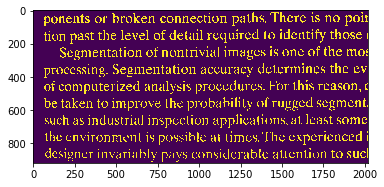

In [5]:
import cv2
import numpy as np
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
import scipy.misc
from skimage import data
from skimage import filters
from skimage import exposure
import numpy.ma as ma


img = cv2.imread('C:/Users/user/Documents/DIP/DIP3E_Original_Images_CH09/Fig0929(a)(text_image).tif',0)
plt.imshow(img)
plt.show()

### opening by reconstruction

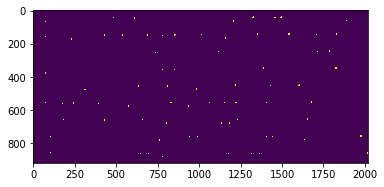

In [25]:
kernel = np.zeros((51,51),dtype=np.uint8)
kernel[:,51//2] = 1
erosion = cv2.erode(img,kernel)
plt.imshow(erosion)
plt.show()

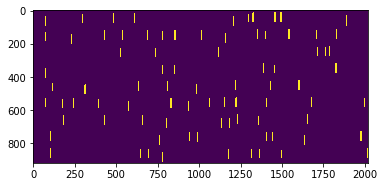

In [26]:
opening_img = cv2.dilate(erosion,kernel)
plt.imshow(opening_img)
plt.show()

In [28]:
def geodesic_dialation(F,B,G):
    a = cv2.dilate(F,B)
    a = a.astype(np.bool)
    return np.logical_and(a,G).astype(np.uint8)

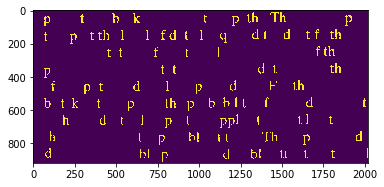

In [29]:
kernel_geo = np.ones((3,3),dtype=np.uint8)
D = opening_img.copy()
while True:
    D_new = geodesic_dialation(D,kernel_geo,img)
    if np.array_equal(D_new,D):
        break
    else:
        D = D_new


plt.imshow(D)
plt.show()